# 포지션, 나이, WAR, 잔류 여부 포함 기계 학습 도전

In [ ]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')

df_pi = pd.read_excel('데이터톤 투수 최종 데이터.xlsx')
df_ba = pd.read_excel('데이터톤 야수 최종 데이터.xlsx')

## 1차 시기 : 연도별 성적에 가중치 없이 단순 합산 진행

In [ ]:
# 원본 데이터 보존을 위한 카피
df_pi_m1 = df_pi.copy()

df_ba_m1 = df_ba.copy()

In [ ]:
# 일단 필요한 칼럼만 따오기
df_pi_m1 = df_pi_m1[['구단명', '선수명', '포지션', 'Throw', 'Age', '종합 WAR', 'FA 계약 연수', 'FA 계약 총액', '잔류 여부']]
df_ba_m1 = df_ba_m1[['구단명', '선수명', '포지션', 'Throw', 'Bat', 'Age', 'oWAR', 'dWAR', 'FA 계약 연수', 'FA 계약 총액', '잔류 여부']]

df_ba_m1['종합 WAR'] = df_ba_m1['oWAR'] + df_ba_m1['dWAR']
df_ba_m1 = df_ba_m1.drop(['oWAR', 'dWAR'], axis=1)

In [ ]:
df_pi_m1['group'] = df_pi_m1.groupby('선수명').cumcount() // 4
df_ba_m1['group'] = df_ba_m1.groupby('선수명').cumcount() // 4

df_pi_m1['FA 선언 시점 연령'] = df_pi_m1.groupby(['선수명', 'group'])['Age'].transform(lambda x: x.iloc[-1])
df_ba_m1['FA 선언 시점 연령'] = df_ba_m1.groupby(['선수명', 'group'])['Age'].transform(lambda x: x.iloc[-1])

df_pi_m1 = df_pi_m1.drop('Age', axis=1)
df_ba_m1 = df_ba_m1.drop('Age', axis=1)

df_pi_m1 = df_pi_m1.groupby(['선수명', 'group']).agg({
    '포지션': lambda x: x.mode().iloc[0],
    'Throw' : lambda x : x.mode().iloc[0],
    'FA 선언 시점 연령': 'max',
    '종합 WAR': 'sum',
    '잔류 여부': lambda x: x.mode().iloc[0],
    'FA 계약 연수': 'sum',
    'FA 계약 총액': 'sum'
}).reset_index()

df_ba_m1 = df_ba_m1.groupby(['선수명', 'group']).agg({
    '포지션': lambda x: x.mode().iloc[0],
    'Throw' : lambda x : x.mode().iloc[0],
    'Bat' : lambda x : x.mode().iloc[0],
    'FA 선언 시점 연령': 'max',
    '종합 WAR': 'sum',
    '잔류 여부': lambda x: x.mode().iloc[0],
    'FA 계약 연수': 'sum',
    'FA 계약 총액': 'sum'
}).reset_index()

In [ ]:
# 해외 이적 선수는 kbo 안에서 계약한 것이 아니고 은퇴 선수는 계약 내역이 없어 이적/잔류 케이스만 추출
df_pi_m1 = df_pi_m1[df_pi_m1['잔류 여부'].isin(['이적', '잔류'])]
df_ba_m1 = df_ba_m1[df_ba_m1['잔류 여부'].isin(['이적', '잔류'])]

In [ ]:
# 필요 없는 칼럼 제거
df_pi_m1 = df_pi_m1.drop('group', axis=1)
df_ba_m1 = df_ba_m1.drop('group', axis=1)

In [ ]:
# 테스트 데이터에도 동일한 처리 진행

df_pi_25 = pd.read_excel('2025 KBO 투수 FA.xlsx')
df_ba_25 = pd.read_excel('2025 KBO 야수 FA.xlsx')

df_pi_25 = df_pi_25[['구단명', '선수명', '포지션', 'Throw', 'Age', '종합 WAR', 'FA 계약 연수', 'FA 계약 총액', '잔류 여부']]
df_ba_25 = df_ba_25[['구단명', '선수명', '포지션', 'Throw', 'Bat', 'Age', 'oWAR', 'dWAR', 'FA 계약 연수', 'FA 계약 총액', '잔류 여부']]

df_ba_25['종합 WAR'] = df_ba_25['oWAR'] + df_ba_25['dWAR']
df_ba_25 = df_ba_25.drop(['oWAR', 'dWAR'], axis=1)

In [ ]:
df_pi_25['group'] = df_pi_25.groupby('선수명').cumcount() // 4
df_ba_25['group'] = df_ba_25.groupby('선수명').cumcount() // 4

df_pi_25['FA 선언 시점 연령'] = df_pi_25.groupby(['선수명', 'group'])['Age'].transform(lambda x: x.iloc[-1])
df_ba_25['FA 선언 시점 연령'] = df_ba_25.groupby(['선수명', 'group'])['Age'].transform(lambda x: x.iloc[-1])

df_pi_25 = df_pi_25.drop('Age', axis=1)
df_ba_25 = df_ba_25.drop('Age', axis=1)

df_pi_25 = df_pi_25.groupby(['선수명', 'group']).agg({
    '포지션': lambda x: x.mode().iloc[0],
    'Throw' : lambda x : x.mode().iloc[0],
    'FA 선언 시점 연령': 'max',
    '종합 WAR': 'sum',
    '잔류 여부': lambda x: x.mode().iloc[0],
    'FA 계약 연수': 'sum',
    'FA 계약 총액': 'sum'
}).reset_index()

df_ba_25 = df_ba_25.groupby(['선수명', 'group']).agg({
    '포지션': lambda x: x.mode().iloc[0],
    'Throw' : lambda x : x.mode().iloc[0],
    'Bat' : lambda x : x.mode().iloc[0],
    'FA 선언 시점 연령': 'max',
    '종합 WAR': 'sum',
    '잔류 여부': lambda x: x.mode().iloc[0],
    'FA 계약 연수': 'sum',
    'FA 계약 총액': 'sum'
}).reset_index()

In [ ]:
# 해외 이적 선수는 kbo 안에서 계약한 것이 아니고 은퇴 선수는 계약 내역이 없어 이적/잔류 케이스만 추출
df_pi_25 = df_pi_25[df_pi_25['잔류 여부'].isin(['이적', '잔류'])]
df_ba_25 = df_ba_25[df_ba_25['잔류 여부'].isin(['이적', '잔류'])]

In [ ]:
# 필요없는 칼럼 정리
df_pi_25 = df_pi_25.drop('group', axis=1)
df_ba_25 = df_ba_25.drop('group', axis=1)

In [ ]:
# 선수명은 계약 결과와 무관하므로 따로 임시 보관
# 투수 선수명 분리
names_pi_1 = df_pi_m1['선수명']
df_pi_m1 = df_pi_m1.drop('선수명', axis=1)

names_pi_25 = df_pi_25['선수명']
df_pi_25 = df_pi_25.drop('선수명', axis=1)

# 야수 선수명 분리
names_ba_1 = df_ba_m1['선수명']
df_ba_m1 = df_ba_m1.drop('선수명', axis=1)

names_ba_25 = df_ba_25['선수명']
df_ba_25 = df_ba_25.drop('선수명', axis=1)

In [ ]:
# 원핫 인코딩으로 포지션과 잔류 여부 인코딩
# 문자형 칼럼인 포지션과 잔류 여부, B/T만 골라 인코딩
# 투수와 타자의 칼럼 종류가 달라 둘을 따로 인코딩
columns_pi = df_pi_m1.select_dtypes(include='object').columns

data_pi = pd.concat([df_pi_m1, df_pi_25])
data_oh_pi = pd.get_dummies(data_pi)

df_pi_m1 = data_oh_pi.iloc[:len(df_pi_m1)]
df_pi_25 = data_oh_pi.iloc[len(df_pi_m1):]


columns_ba = df_ba_m1.select_dtypes(include='object').columns

data_ba = pd.concat([df_ba_m1, df_ba_25])
data_oh_ba = pd.get_dummies(data_ba)

df_ba_m1 = data_oh_ba.iloc[:len(df_ba_m1)]
df_ba_25 = data_oh_ba.iloc[len(df_ba_m1):]

In [ ]:
# 훈련용-검증용 투수 데이터 분할(2013~2023)
from sklearn.model_selection import train_test_split

target_pi_m1 = df_pi_m1[['FA 계약 연수', 'FA 계약 총액']]
target_pi_25 = df_pi_25[['FA 계약 연수', 'FA 계약 총액']]

df_pi_m1 = df_pi_m1.drop(['FA 계약 연수', 'FA 계약 총액'], axis=1)
df_pi_25 = df_pi_25.drop(['FA 계약 연수', 'FA 계약 총액'], axis=1)

x_pi_train, x_pi_val, y_pi_train, y_pi_val = train_test_split(df_pi_m1, target_pi_m1, test_size=0.2, random_state=0)


# 훈련용-검증용 야수 데이터 분할(2013~2023)

target_ba_m1 = df_ba_m1[['FA 계약 연수', 'FA 계약 총액']]
target_ba_25 = df_ba_25[['FA 계약 연수', 'FA 계약 총액']]

df_ba_m1 = df_ba_m1.drop(['FA 계약 연수', 'FA 계약 총액'], axis=1)
df_ba_25 = df_ba_25.drop(['FA 계약 연수', 'FA 계약 총액'], axis=1)

x_ba_train, x_ba_val, y_ba_train, y_ba_val = train_test_split(df_ba_m1, target_ba_m1, test_size=0.2, random_state=0)

### 연수, 총액에 모두 회귀 모델 적용

In [ ]:
# 앞서 종속변수인 계약 연수와 계약 금액과는 선형적인 상관관계가 존재함을 확인한 바 있음
# 단순한 회귀모델은 개별 종속변수에 독립적인 회귀분석을 진행하므로 결과가 의도했던 바와 달라질 위험이 큼
# 요소 사이의 관계를 고려할 수 있는 딥러닝 기법 사용
# 투수부터 분석 진행

import tensorflow as tf
from tensorflow.keras import *

# 입력 차원은 칼럼 수, 출력 차원은 종속변수 개수
input_dim = x_pi_train.shape[1]
model = models.Sequential([
    layers.Input(shape=(input_dim, )),
    layers.Dense(64, activation='relu'),
    layers.BatchNormalization(),
    layers.Dense(32, activation='relu'),
    layers.Dense(2)
])

model.compile(optimizer='adam', loss='mse')
model.fit(x_pi_train, y_pi_train, epochs=50, batch_size=16, validation_data=(x_pi_val, y_pi_val))
model.evaluate(df_pi_25, target_pi_25)

Epoch 1/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 2s 149ms/step - loss: 570.2820 - val_loss: 553.2685
Epoch 2/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step - loss: 691.6384 - val_loss: 550.6312
Epoch 3/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step - loss: 534.1045 - val_loss: 547.0237
Epoch 4/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - loss: 518.8970 - val_loss: 541.2911
Epoch 5/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step - loss: 589.1815 - val_loss: 533.0027
Epoch 6/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - loss: 554.9366 - val_loss: 526.1942
Epoch 7/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step - loss: 557.8250 - val_loss: 520.9771
Epoch 8/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - loss: 581.5689 - val_loss: 516.1396
Epoch 9/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - loss: 523.2590 - val_loss: 513.0450
Epoch 10/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - loss: 497.1701 - val_loss: 510.2839
Epoch 11/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step - loss: 547.7038 - val_loss: 507.4104
Epoch 12/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 

233.20082092285156

In [ ]:
y_pred_pi_25 = model.predict(df_pi_25)
y_pred_pi_25

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step


array([[ 3.013124 ,  7.282212 ],
       [ 4.0113583,  9.82595  ],
       [ 2.820883 ,  9.791252 ],
       [ 4.691529 ,  9.2881565],
       [ 4.895189 , 45.91034  ],
       [ 5.549797 , 12.334317 ],
       [ 3.920474 ,  9.261023 ],
       [ 2.9853787, 12.176852 ],
       [ 3.6606443,  8.74991  ],
       [ 3.302531 , 22.35681  ],
       [ 4.939954 , 42.682228 ]], dtype=float32)

In [ ]:
comparison = pd.DataFrame({
    '선수명' : names_pi_25,
    '예측 연수': y_pred_pi_25[:, 0],
    '예측 총액': y_pred_pi_25[:, 1],
    '실제 연수': target_pi_25['FA 계약 연수'].values,
    '실제 총액': target_pi_25['FA 계약 총액'].values
})

comparison

,선수명,예측 연수,예측 총액,실제 연수,실제 총액
0,구승민,3.013124,7.282212,4.0,21.0
1,김강률,4.011358,9.825950,4.0,14.0
2,김원중,2.820883,9.791252,4.0,54.0
3,노경은,4.691529,9.288157,3.0,25.0
5,엄상백,4.895189,45.910339,4.0,78.0
6,우규민,5.549797,12.334317,2.0,7.0
7,이용찬,3.920474,9.261023,3.0,10.0
8,임기영,2.985379,12.176852,3.0,15.0
9,임정호,3.660644,8.749910,3.0,12.0
10,장현식,3.302531,22.356810,4.0,52.0


In [ ]:
from sklearn.metrics import r2_score

r2_y1 = r2_score(target_pi_25.iloc[:, 0], y_pred_pi_25[:, 0])  # 계약 연수
r2_y2 = r2_score(target_pi_25.iloc[:, 1], y_pred_pi_25[:, 1])  # 계약 총액

print(f"연수 R²: {r2_y1:.4f}")
print(f"총액 R²: {r2_y2:.4f}")

# 투수의 경우 던지는 손을 데이터에 넣었더니 오히려 r^2이 크게 감소해 평균 값으로 맞히는 것만도 못하게 됐음
# 가중치 반영한 값으로 다시 시도한 후 우사와 우언을 묶어 최종 진행 시도
# 그래도 안 된다면 던지는 손을 아예 빼고 원래 모델로 재도전하기로

연수 R²: -3.5020
총액 R²: 0.2411


In [ ]:
from sklearn.metrics import mean_squared_error

mse_pi_y1 = mean_squared_error(target_pi_25.iloc[:, 0], y_pred_pi_25[:, 0])
mse_pi_y2 = mean_squared_error(target_pi_25.iloc[:, 1], y_pred_pi_25[:, 1])

print('mse_연도 :', mse_pi_y1, 'mse_총액 :', mse_pi_y2)

mse_연도 : 1.9347250193460725 mse_총액 : 464.4668923416839


## 2차 시기 : 연도별로 성적에 가중치 적용, 연도는 분류 모델로 적용

In [ ]:
df_pi_m2 = df_pi.copy()
df_ba_m2 = df_ba.copy()

In [ ]:
df_pi_m2 = df_pi_m2[['구단명', '선수명', '포지션', 'Throw', 'Age', '종합 WAR', '잔류 여부', 'FA 계약 연수', 'FA 계약 총액']]
df_ba_m2 = df_ba_m2[['구단명', '선수명', '포지션', 'Throw', 'Bat', 'Age', 'oWAR', 'dWAR', '잔류 여부', 'FA 계약 연수', 'FA 계약 총액']]

df_ba_m2['종합 WAR'] = df_ba_m2['oWAR'] + df_ba_m2['dWAR']
df_ba_m2.drop(['oWAR', 'dWAR'], axis=1, inplace=True)

In [ ]:
# 연도별 성적에 가중치 매기기
df_pi_m2['weight'] = ((df_pi_m2.index % 4) + 1) / 10 * 4
df_ba_m2['weight'] = ((df_ba_m2.index % 4) + 1) / 10 * 4

# 왜 위와 같은 산식을 썼는지?
# 선수의 데이터가 4행 단위로 묶여 있어 인덱스를 4로 나눈 나머지에 1을 더하면 1, 2, 3, 4가 나옴
# 이것을 10으로 나누면 가중치 0.1, 0.2, 0.3, 0.4가 적용됨
# 그러나 1차 시기에서 가중치의 합이 1:1:1:1로 적용됐으므로 동일한 스케일로 조정하기 위해 가중치 합 4가 나오도록 4를 곱함

In [ ]:
# 군 복무한 선수들의 가중치를 이월해서 적용
def apply_weight_with_service_adjustment(df):
    def redistribute_weights(group):
        weights = group['weight'].tolist()
        teams = group['구단명'].tolist()
        new_weights = [0] * len(weights)
        carry_over = 0

        for i in range(len(weights)):
            if teams[i] == '군 복무':
                carry_over += weights[i]  # 군 복무면 이월, 실전 시즌에 누적 가중치 반영
            else:
                new_weights[i] = weights[i] + carry_over
                carry_over = 0            # 반영 후 초기화

        group['new_weight'] = new_weights
        return group

    return df.groupby('선수명', group_keys=False).apply(redistribute_weights)


# 선수명 기준으로 그룹화 후 적용
df_pi_m2 = apply_weight_with_service_adjustment(df_pi_m2)
df_ba_m2 = apply_weight_with_service_adjustment(df_ba_m2)

In [ ]:
df_pi_m2['가중치 적용 종합 WAR'] = df_pi_m2['종합 WAR'] * df_pi_m2['new_weight']
df_ba_m2['가중치 적용 종합 WAR'] = df_ba_m2['종합 WAR'] * df_ba_m2['new_weight']

In [ ]:
# 4년 단위로 쓰인 데이터를 선수별로 1줄로 정리
df_pi_m2['group'] = df_pi_m2.groupby('선수명').cumcount() // 4
df_ba_m2['group'] = df_ba_m2.groupby('선수명').cumcount() // 4

df_pi_m2['FA 선언 시점 연령'] = df_pi_m2.groupby(['선수명', 'group'])['Age'].transform(lambda x: x.iloc[-1])
df_ba_m2['FA 선언 시점 연령'] = df_ba_m2.groupby(['선수명', 'group'])['Age'].transform(lambda x: x.iloc[-1])

df_pi_m2 = df_pi_m2.drop('Age', axis=1)
df_ba_m2 = df_ba_m2.drop('Age', axis=1)

# 성적은 누적합, 기타 값은 최빈값으로 고정
df_pi_m2 = df_pi_m2.groupby(['선수명', 'group']).agg({
    '포지션': lambda x: x.mode().iloc[0],
    'Throw' : lambda x : x.mode().iloc[0],
    'FA 선언 시점 연령': 'max',
    '가중치 적용 종합 WAR' : 'sum',
    '잔류 여부': lambda x: x.mode().iloc[0],
    'FA 계약 연수': 'sum',
    'FA 계약 총액': 'sum'
}).reset_index()

# 야수도 같은 방식으로 진행
df_ba_m2 = df_ba_m2.groupby(['선수명', 'group']).agg({
    '포지션': lambda x: x.mode().iloc[0],
    'Throw' : lambda x : x.mode().iloc[0],
    'Bat' : lambda x : x.mode().iloc[0],
    'FA 선언 시점 연령': 'max',
    '가중치 적용 종합 WAR' : 'sum',
    '잔류 여부': lambda x: x.mode().iloc[0],
    'FA 계약 연수': 'sum',
    'FA 계약 총액': 'sum'
}).reset_index()

In [ ]:
# 해외 이적 선수는 kbo 안에서 계약한 것이 아니고 은퇴 선수는 계약 내역이 없어 이적/잔류 케이스만 추출
df_pi_m2 = df_pi_m2[df_pi_m2['잔류 여부'].isin(['이적', '잔류'])]
df_ba_m2 = df_ba_m2[df_ba_m2['잔류 여부'].isin(['이적', '잔류'])]

In [ ]:
# 필요 없는 칼럼 제거
df_pi_m2 = df_pi_m2[['선수명', '포지션', 'Throw', 'FA 선언 시점 연령', '가중치 적용 종합 WAR', '잔류 여부', 'FA 계약 연수', 'FA 계약 총액']]
df_ba_m2 = df_ba_m2[['선수명', '포지션', 'Throw', 'Bat', 'FA 선언 시점 연령', '가중치 적용 종합 WAR', '잔류 여부', 'FA 계약 연수', 'FA 계약 총액']]

#### 테스트 데이터 전처리

In [ ]:
# 테스트 데이터에도 동일한 처리 진행

df_pi_25 = pd.read_excel('2025 KBO 투수 FA.xlsx')
df_ba_25 = pd.read_excel('2025 KBO 야수 FA.xlsx')

df_pi_25 = df_pi_25[['구단명', '선수명', '포지션', 'Throw', 'Age', '종합 WAR', 'FA 계약 연수', 'FA 계약 총액', '잔류 여부']]
df_ba_25 = df_ba_25[['구단명', '선수명', '포지션', 'Throw', 'Bat', 'Age', 'oWAR', 'dWAR', 'FA 계약 연수', 'FA 계약 총액', '잔류 여부']]

df_ba_25['종합 WAR'] = df_ba_25['oWAR'] + df_ba_25['dWAR']
df_ba_25 = df_ba_25.drop(['oWAR', 'dWAR'], axis=1)

In [ ]:
# 연도별 성적에 가중치 매기기
df_pi_25['weight'] = ((df_pi_25.index % 4) + 1) / 10 * 4
df_ba_25['weight'] = ((df_ba_25.index % 4) + 1) / 10 * 4

In [ ]:
# 군 복무한 선수들의 가중치를 이월해서 적용
def apply_weight_with_service_adjustment(df):
    def redistribute_weights(group):
        weights = group['weight'].tolist()
        teams = group['구단명'].tolist()
        new_weights = [0] * len(weights)
        carry_over = 0

        for i in range(len(weights)):
            if teams[i] == '군 복무':
                carry_over += weights[i]  # 군 복무면 이월, 실전 시즌에 누적 가중치 반영
            else:
                new_weights[i] = weights[i] + carry_over
                carry_over = 0            # 반영 후 초기화

        group['new_weight'] = new_weights
        return group

    return df.groupby('선수명', group_keys=False).apply(redistribute_weights)


# 선수명 기준으로 그룹화 후 적용
df_pi_25 = apply_weight_with_service_adjustment(df_pi_25)
df_ba_25 = apply_weight_with_service_adjustment(df_ba_25)

In [ ]:
df_pi_25['가중치 적용 종합 WAR'] = df_pi_25['종합 WAR'] * df_pi_25['new_weight']
df_ba_25['가중치 적용 종합 WAR'] = df_ba_25['종합 WAR'] * df_ba_25['new_weight']

In [ ]:
df_pi_25['group'] = df_pi_25.groupby('선수명').cumcount() // 4
df_ba_25['group'] = df_ba_25.groupby('선수명').cumcount() // 4

df_pi_25['FA 선언 시점 연령'] = df_pi_25.groupby(['선수명', 'group'])['Age'].transform(lambda x: x.iloc[-1])
df_ba_25['FA 선언 시점 연령'] = df_ba_25.groupby(['선수명', 'group'])['Age'].transform(lambda x: x.iloc[-1])

df_pi_25 = df_pi_25.drop('Age', axis=1)
df_ba_25 = df_ba_25.drop('Age', axis=1)

df_pi_25 = df_pi_25.groupby(['선수명', 'group']).agg({
    '포지션': lambda x: x.mode().iloc[0],
    'Throw' : lambda x : x.mode().iloc[0],
    'FA 선언 시점 연령': 'max',
    '가중치 적용 종합 WAR' : 'sum',
    '잔류 여부': lambda x: x.mode().iloc[0],
    'FA 계약 연수': 'sum',
    'FA 계약 총액': 'sum'
}).reset_index()

df_ba_25 = df_ba_25.groupby(['선수명', 'group']).agg({
    '포지션': lambda x: x.mode().iloc[0],
    'Throw' : lambda x : x.mode().iloc[0],
    'Bat' : lambda x : x.mode().iloc[0],
    'FA 선언 시점 연령': 'max',
    '가중치 적용 종합 WAR' : 'sum',
    '잔류 여부': lambda x: x.mode().iloc[0],
    'FA 계약 연수': 'sum',
    'FA 계약 총액': 'sum'
}).reset_index()

In [ ]:
# 해외 이적 선수는 kbo 안에서 계약한 것이 아니고 은퇴 선수는 계약 내역이 없어 이적/잔류 케이스만 추출
df_pi_25 = df_pi_25[df_pi_25['잔류 여부'].isin(['이적', '잔류'])]
df_ba_25 = df_ba_25[df_ba_25['잔류 여부'].isin(['이적', '잔류'])]

In [ ]:
# 필요 없는 칼럼 제거
df_pi_25 = df_pi_25[['선수명', '포지션', 'Throw', 'FA 선언 시점 연령', '가중치 적용 종합 WAR', '잔류 여부', 'FA 계약 연수', 'FA 계약 총액']]
df_ba_25 = df_ba_25[['선수명', '포지션', 'Throw', 'Bat', 'FA 선언 시점 연령', '가중치 적용 종합 WAR', '잔류 여부', 'FA 계약 연수', 'FA 계약 총액']]

In [ ]:
# 선수명은 계약 결과와 무관하므로 따로 임시 보관
names_pi_1 = df_pi_m2['선수명']
names_pi_25 = df_pi_25['선수명']

df_pi_m2 = df_pi_m2.drop('선수명', axis=1)
df_pi_25 = df_pi_25.drop('선수명', axis=1)

names_ba_1 = df_ba_m2['선수명']
names_ba_25 = df_ba_25['선수명']

df_ba_m2 = df_ba_m2.drop('선수명', axis=1)
df_ba_25 = df_ba_25.drop('선수명', axis=1)

#### 원핫 인코딩으로 문자형인 포지션과 잔류 여부, 던지는 손과 치는 손 인코딩

In [ ]:
# 원핫 인코딩으로 포지션과 잔류 여부 인코딩
# 문자형 칼럼인 포지션과 잔류 여부만 골라 인코딩
columns_pi = df_pi_m2.select_dtypes(include='object').columns

data_pi = pd.concat([df_pi_m2, df_pi_25])
data_pi_oh = pd.get_dummies(data_pi)

df_pi_m2 = data_pi_oh.iloc[:len(df_pi_m2)]
df_pi_25 = data_pi_oh.iloc[len(df_pi_m2):]

columns_ba = df_ba_m2.select_dtypes(include='object').columns

data_ba = pd.concat([df_ba_m2, df_ba_25])
data_ba_oh = pd.get_dummies(data_ba)

df_ba_m2 = data_ba_oh.iloc[:len(df_ba_m2)]
df_ba_25 = data_ba_oh.iloc[len(df_ba_m2):]


In [ ]:
# 훈련용-검증용 투수 데이터 분할(2013~2023)
from sklearn.model_selection import train_test_split

target_pi_m2 = df_pi_m2[['FA 계약 연수', 'FA 계약 총액']]
target_pi_25 = df_pi_25[['FA 계약 연수', 'FA 계약 총액']]

df_pi_m2 = df_pi_m2.drop(['FA 계약 연수', 'FA 계약 총액'], axis=1)
df_pi_25 = df_pi_25.drop(['FA 계약 연수', 'FA 계약 총액'], axis=1)

x_pi_train, x_pi_val, y_pi_train, y_pi_val = train_test_split(df_pi_m2, target_pi_m2, test_size=0.2, random_state=0)


# 훈련용-검증용 야수 데이터 분할(2013~2023)

target_ba_m2 = df_ba_m2[['FA 계약 연수', 'FA 계약 총액']]
target_ba_25 = df_ba_25[['FA 계약 연수', 'FA 계약 총액']]

df_ba_m2 = df_ba_m2.drop(['FA 계약 연수', 'FA 계약 총액'], axis=1)
df_ba_25 = df_ba_25.drop(['FA 계약 연수', 'FA 계약 총액'], axis=1)

x_ba_train, x_ba_val, y_ba_train, y_ba_val = train_test_split(df_ba_m2, target_ba_m2, test_size=0.2, random_state=0)

#### 연수와 총액 모두 회귀 모델로 예측

In [ ]:
# 앞서 종속변수인 계약 연수와 계약 금액과는 선형적인 상관관계가 존재함을 확인한 바 있음
# 단순한 회귀모델은 개별 종속변수에 독립적인 회귀분석을 진행하므로 결과가 의도했던 바와 달라질 위험이 큼
# 요소 사이의 관계를 고려할 수 있는 딥러닝 기법 사용

import tensorflow as tf
from tensorflow.keras import *

# 입력 차원은 칼럼 수, 출력 차원은 종속변수 개수
input_dim = x_pi_train.shape[1]
model = models.Sequential([
    layers.Input(shape=(input_dim, )),
    layers.Dense(64, activation='relu'),
    layers.BatchNormalization(),
    layers.Dense(32, activation='relu'),
    layers.Dense(2)
])

model.compile(optimizer='adam', loss='mse')
model.fit(x_pi_train, y_pi_train, epochs=50, batch_size=16, validation_data=(x_pi_val, y_pi_val))
model.evaluate(df_pi_25, target_pi_25)

Epoch 1/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 2s 84ms/step - loss: 626.6187 - val_loss: 629.8824
Epoch 2/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 686.1174 - val_loss: 604.1669
Epoch 3/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 636.4147 - val_loss: 585.6865
Epoch 4/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 514.3286 - val_loss: 569.1599
Epoch 5/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 599.0633 - val_loss: 554.4138
Epoch 6/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 500.4032 - val_loss: 544.6940
Epoch 7/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 644.6370 - val_loss: 536.0764
Epoch 8/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 590.7675 - val_loss: 525.9258
Epoch 9/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 447.5564 - val_loss: 514.7910
Epoch 10/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 514.0616 - val_loss: 504.6916
Epoch 11/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 576.8381 - val_loss: 495.8135
Epoch 12/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 2

309.8920593261719

In [ ]:
y_pred_pi_25 = model.predict(df_pi_25)

comparison2 = pd.DataFrame({
    '선수명' : names_pi_25,
    '예측 연수': y_pred_pi_25[:, 0],
    '예측 총액': y_pred_pi_25[:, 1],
    '실제 연수': target_pi_25['FA 계약 연수'].values,
    '실제 총액': target_pi_25['FA 계약 총액'].values
})

comparison2

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 81ms/step


,선수명,예측 연수,예측 총액,실제 연수,실제 총액
0,구승민,2.241859,5.053569,4.0,21.0
1,김강률,2.296287,2.842238,4.0,14.0
2,김원중,0.633165,7.102501,4.0,54.0
3,노경은,0.727886,7.313195,3.0,25.0
5,엄상백,2.712088,44.167988,4.0,78.0
6,우규민,2.896301,3.989007,2.0,7.0
7,이용찬,3.019603,6.977226,3.0,10.0
8,임기영,1.051151,3.456315,3.0,15.0
9,임정호,2.814015,6.828937,3.0,12.0
10,장현식,2.324126,12.615288,4.0,52.0


In [ ]:
from sklearn.metrics import r2_score

r2_y1 = r2_score(target_pi_25.iloc[:, 0], y_pred_pi_25[:, 0])  # 계약 연수
r2_y2 = r2_score(target_pi_25.iloc[:, 1], y_pred_pi_25[:, 1])  # 계약 총액

print(f"연수 R²: {r2_y1:.4f}")
print(f"총액 R²: {r2_y2:.4f}")

# ;;

연수 R²: -5.8869
총액 R²: -0.0078


In [ ]:
from sklearn.metrics import mean_squared_error

mse_pi_y1 = mean_squared_error(target_pi_25.iloc[:, 0], y_pred_pi_25[:, 0])
mse_pi_y2 = mean_squared_error(target_pi_25.iloc[:, 1], y_pred_pi_25[:, 1])

print('mse_연도 :', mse_pi_y1, 'mse_총액 :', mse_pi_y2)

# 마지막으로 연수에는 분류를 적용한 모델까지 한 번 돌려보기로

mse_연도 : 2.9596774902275076 mse_총액 : 616.8244236832389


주목 포인트

- FA 계약 연수에 분류 모델을 적용해 다시 시도
- 연수로 해도 결과가 불량하면 투/타 데이터 삽입에서 문제가 생겼다고 봐야
- 정규분포와 차이가 큰 총액 분포로 인해 회귀모델을 쓸 총액에는 RobustScaler 적용

#### 연수는 분류 모델로, 총액은 회귀 모델로 예측

In [ ]:
# 모델의 평균 성능 측정을 위해 랜덤성 억제 코드 실행
import os
os.environ['PYTHONHASHSEED'] = '42'
os.environ['TF_DETERMINISTIC_OPS'] = '1'

import random
import numpy as np
import tensorflow as tf

random.seed(42)
np.random.seed(42)
tf.random.set_seed(42)

In [ ]:
from sklearn.preprocessing import RobustScaler
import pandas as pd
from sklearn.model_selection import *

# 데이터 결합
data = pd.concat([df_pi_m2, df_pi_25], ignore_index=True)

# 원핫 인코딩 (포지션, 잔류 여부)
cat_cols = ['포지션', 'Throw', '잔류 여부']
data_oh = pd.get_dummies(data[cat_cols])

# 입출력 정의
x_pi_all = pd.concat([data_oh, data[['FA 선언 시점 연령', '가중치 적용 종합 WAR']]], axis=1)
y_pi_year_all = data['FA 계약 연수'] - 1  # to_categorical을 위한 0 기반 인덱스
y_pi_value_all = data['FA 계약 총액']

# 훈련/테스트 분할
x_pi_train = x_pi_all.iloc[:len(df_pi_m2)]
x_pi_test = x_pi_all.iloc[len(df_pi_m2):]
y_pi_year_train = y_pi_year_all.iloc[:len(df_pi_m2)]
y_pi_year_test = y_pi_year_all.iloc[len(df_pi_m2):]
y_pi_value_train = y_pi_value_all.iloc[:len(df_pi_m2)]
y_pi_value_test = y_pi_value_all.iloc[len(df_pi_m2):]

feature_names = list(x_pi_test.columns)

# 연수 → 원핫 인코딩
from tensorflow.keras.utils import to_categorical

y_pi_year_train_cat = to_categorical(y_pi_year_train)
y_pi_year_test_cat = to_categorical(y_pi_year_test)

# 정규분포에 가까운 총액 분포를 만들고자 RobustScaler 사용
scaler = RobustScaler()
y_pi_value_train_scaled = scaler.fit_transform(y_pi_value_train.values.reshape(-1, 1))
y_pi_value_test_scaled = scaler.transform(y_pi_value_test.values.reshape(-1, 1))

# 훈련/검증 분할
x_pi_tr, x_pi_val, y_pi_year_tr, y_pi_year_val, y_pi_value_tr, y_pi_value_val = train_test_split(x_pi_train, y_pi_year_train_cat, y_pi_value_train_scaled, test_size=0.2, random_state=0)

# 케라스 분석을 위해 ndarray 형태로 자료를 변형
x_pi_tr = x_pi_tr.astype('float32').values
x_pi_val = x_pi_val.astype('float32').values
x_pi_test = x_pi_test.astype('float32').values
x_pi_train = x_pi_train.astype('float32').values

# 모델 구성
from tensorflow.keras.models import Model
from tensorflow.keras.layers import *
from tensorflow.keras.optimizers import Adam

input_layer = Input(shape=(x_pi_tr.shape[1],))
x = Dense(64)(input_layer)
x = ReLU()(x)
x = Dense(32)(x)
x = LeakyReLU()(x)

# 연수 분류 출력
output_pi_year = Dense(4, name='year_output_dense')(x)
output_pi_year = Activation('softmax', name='year_output')(output_pi_year)

# 총액 회귀 출력
output_pi_value = Dense(1, name='value_output_dense')(x)
output_pi_value = Activation('linear', name='value_output')(output_pi_value)

model = Model(inputs=input_layer, outputs=[output_pi_year, output_pi_value])
model.compile(optimizer=Adam(0.01),
    loss={'year_output': 'categorical_crossentropy', 'value_output': 'mse'},
    metrics={'year_output': 'accuracy', 'value_output': 'mse'})

# 학습
model.fit(x_pi_tr,
          {'year_output': y_pi_year_tr, 'value_output': y_pi_value_tr},
          validation_data=(x_pi_val, {'year_output': y_pi_year_val, 'value_output': y_pi_value_val}),
          epochs=100, batch_size=16, verbose=1)

# 예측 및 역변환
y_pi_pred_year_prob, y_pi_pred_value_scaled = model.predict(x_pi_test)
y_pi_pred_year_cls = y_pi_pred_year_prob.argmax(axis=1) + 1
y_pi_pred_value = scaler.inverse_transform(y_pi_pred_value_scaled)

y_pi_true_year_cls = y_pi_year_test.values + 1
y_pi_true_value = scaler.inverse_transform(y_pi_value_test_scaled)

# 결과 출력
result_df = pd.DataFrame({
    '선수명' : names_pi_25,
    '예상 연수': y_pi_pred_year_cls,
    '예상 총액': y_pi_pred_value.flatten(),
    '실제 연수': y_pi_true_year_cls,
    '실제 총액': y_pi_true_value.flatten()
})

result_df

Epoch 1/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 2s 111ms/step - loss: 13.4808 - value_output_loss: 10.4195 - value_output_mse: 10.7354 - year_output_accuracy: 0.2397 - year_output_loss: 2.7803 - val_loss: 12.1308 - val_value_output_loss: 10.7897 - val_value_output_mse: 10.7897 - val_year_output_accuracy: 0.4615 - val_year_output_loss: 1.3411
Epoch 2/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 8.4040 - value_output_loss: 6.5371 - value_output_mse: 7.0330 - year_output_accuracy: 0.3388 - year_output_loss: 1.5244 - val_loss: 2.9191 - val_value_output_loss: 1.4040 - val_value_output_mse: 1.4040 - val_year_output_accuracy: 0.0000e+00 - val_year_output_loss: 1.5150
Epoch 3/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 3.5900 - value_output_loss: 2.3076 - value_output_mse: 2.3492 - year_output_accuracy: 0.2047 - year_output_loss: 1.3253 - val_loss: 2.5160 - val_value_output_loss: 1.5102 - val_value_output_mse: 1.5102 - val_year_output_accuracy: 0.4615 - val_year_output_loss: 1.0057
Epoch 4/100

,선수명,예상 연수,예상 총액,실제 연수,실제 총액
0,구승민,2,12.430333,4.0,21.0
1,김강률,4,17.970165,4.0,14.0
2,김원중,4,37.658463,4.0,54.0
3,노경은,4,35.474064,3.0,25.0
5,엄상백,4,67.184502,4.0,78.0
6,우규민,2,1.520142,2.0,7.0
7,이용찬,3,13.905985,3.0,10.0
8,임기영,4,28.587582,3.0,15.0
9,임정호,2,8.049156,3.0,12.0
10,장현식,4,36.875534,4.0,52.0


In [ ]:
from sklearn.metrics import *

ac_pi = accuracy_score(y_pi_true_year_cls, y_pi_pred_year_cls)
fs_pi = f1_score(y_pi_true_year_cls, y_pi_pred_year_cls, average='weighted')
r2_pi = r2_score(y_pi_true_value, y_pi_pred_value)
rmse_pi = mean_squared_error(y_pi_true_value, y_pi_pred_value) ** 0.5

print(f"연수 예측 accuracy : {ac_pi :.4f}")
print(f"연수 예측 f1-score: {fs_pi :.4f}")
print(f"총액 예측 R²: {r2_pi :.4f}")
print(f"총액 예측 RMSE: {rmse_pi :,.0f}억 원")

# 랜덤성을 배제한 케라스 모델의 평균적인 예측치는 f1-score가 0.6 수준
# 총액에서도 상당히 높은 예측력을 보임
# 샘플이 적음에도 배깅 기법을 쓰는 랜덤포레스트에 버금갈 만큼 회귀 예측력이 뛰어났음

연수 예측 accuracy : 0.6364
연수 예측 f1-score: 0.6105
총액 예측 R²: 0.7792
총액 예측 RMSE: 12억 원


In [ ]:
# 한글 폰트 깨짐 방지 코드 실행
import matplotlib
from matplotlib import font_manager

!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv

fontpaths = ["/usr/share/fonts/truetype/nanum/"]
font_files = font_manager.findSystemFonts(fontpaths=fontpaths)

for ff in font_files:
    font_manager.fontManager.addfont(ff)

matplotlib.rc('font', family="NanumGothic")
matplotlib.rcParams['axes.unicode_minus'] = False

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following NEW packages will be installed:
  fonts-nanum
0 upgraded, 1 newly installed, 0 to remove and 34 not upgraded.
Need to get 10.3 MB of archives.
After this operation, 34.1 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu jammy/universe amd64 fonts-nanum all 20200506-1 [10.3 MB]
Fetched 10.3 MB in 1s (11.5 MB/s)
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debconf/FrontEnd/Dialog.pm line 78, <> line 1.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletype
dpkg-preconfigure: unable to re-open stdin: 
Selecting previously unselected package fonts-nanum.
(Reading database ... 126102 files and direc

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step


  0%|          | 0/11 [00:00<?, ?it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 101ms/step
197/197 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step
197/197 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
197/197 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
197/197 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 218ms/step
197/197 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step
197/197 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
197/197 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
197/197 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
197/197 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
197/197 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
197/197 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


  0%|          | 0/11 [00:00<?, ?it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
197/197 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
197/197 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
197/197 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
197/197 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
197/197 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
197/197 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
197/197 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
197/197 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
197/197 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step
197/197 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step
197/197 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


  0%|          | 0/11 [00:00<?, ?it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step
197/197 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step
197/197 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
197/197 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
197/197 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
197/197 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
197/197 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
197/197 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
197/197 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
197/197 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
197/197 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step
197/197 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


  0%|          | 0/11 [00:00<?, ?it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
197/197 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
197/197 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
197/197 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
197/197 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
197/197 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
197/197 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
197/197 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step
197/197 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step
197/197 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
197/197 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
197/197 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


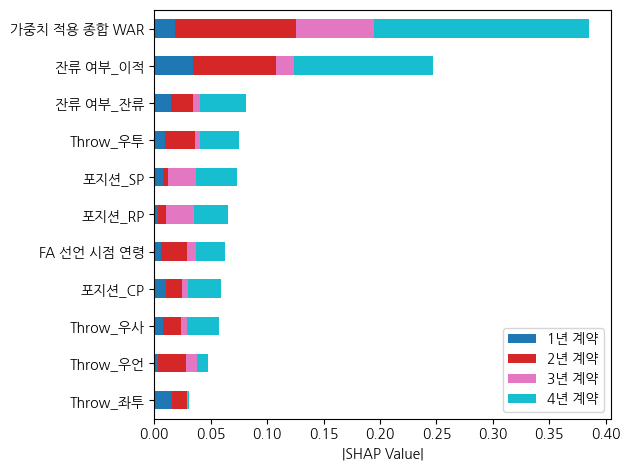

In [ ]:
import shap
import matplotlib.pyplot as plt

x_background = x_pi_train[:100]
x_sample = x_pi_test[:50]
feature_names = feature_names

# 클래스별 SHAP 계산 함수 정의
def predict_class0(x):
    return model.predict(x)[0][:, 0]

def predict_class1(x):
    return model.predict(x)[0][:, 1]

def predict_class2(x):
    return model.predict(x)[0][:, 2]

def predict_class3(x):
    return model.predict(x)[0][:, 3]

# 각각에 대해 explainer 및 SHAP 값 계산
explainer0 = shap.KernelExplainer(predict_class0, x_background)
explainer1 = shap.KernelExplainer(predict_class1, x_background)
explainer2 = shap.KernelExplainer(predict_class2, x_background)
explainer3 = shap.KernelExplainer(predict_class3, x_background)

shap_values0 = explainer0.shap_values(x_sample, nsamples=100)
shap_values1 = explainer1.shap_values(x_sample, nsamples=100)
shap_values2 = explainer2.shap_values(x_sample, nsamples=100)
shap_values3 = explainer3.shap_values(x_sample, nsamples=100)

# 절댓값 기준 평균 SHAP 영향력 계산
mean_abs_shap0 = np.abs(shap_values0).mean(axis=0)
mean_abs_shap1 = np.abs(shap_values1).mean(axis=0)
mean_abs_shap2 = np.abs(shap_values2).mean(axis=0)
mean_abs_shap3 = np.abs(shap_values3).mean(axis=0)

# DataFrame 구성
df = pd.DataFrame({
    '1년 계약': mean_abs_shap0,
    '2년 계약': mean_abs_shap1,
    '3년 계약': mean_abs_shap2,
    '4년 계약': mean_abs_shap3
}, index=feature_names)

df["total"] = df.sum(axis=1)

# 총합 기준으로 정렬
df_sorted = df.sort_values("total", ascending=True)
df_sorted = df_sorted.drop(columns="total")

# 시각화
df_sorted.plot(kind='barh', stacked=True, colormap='tab10')
plt.xlabel("|SHAP Value|")
plt.tight_layout()
plt.show()

In [ ]:
# 같은 방법으로 야수도 진행
# 데이터 결합
data_ba = pd.concat([df_ba_m2, df_ba_25], ignore_index=True)

# 원핫 인코딩 (포지션, 잔류 여부)
cat_cols_ba = ['포지션', 'Throw', 'Bat', '잔류 여부']
data_oh_ba = pd.get_dummies(data_ba[cat_cols_ba])

# 입출력 정의
x_ba_all = pd.concat([data_oh_ba, data_ba[['FA 선언 시점 연령', '가중치 적용 종합 WAR']]], axis=1)
y_year_ba_all = data_ba['FA 계약 연수'] - 1  # to_categorical을 위한 0 기반 인덱스
y_value_ba_all = data_ba['FA 계약 총액']

# 훈련/테스트 분할
x_ba_train = x_ba_all.iloc[:len(df_ba_m2)]
x_ba_test = x_ba_all.iloc[len(df_ba_m2):]
y_year_ba_train = y_year_ba_all.iloc[:len(df_ba_m2)]
y_year_ba_test = y_year_ba_all.iloc[len(df_ba_m2):]
y_value_ba_train = y_value_ba_all.iloc[:len(df_ba_m2)]
y_value_ba_test = y_value_ba_all.iloc[len(df_ba_m2):]

feature_names_ba = list(x_ba_test.columns)

# 연수 → 원핫 인코딩
y_year_ba_train_cat = to_categorical(y_year_ba_train)
y_year_ba_test_cat = to_categorical(y_year_ba_test)

# 총액 → RobustScaler
scaler = RobustScaler()
y_value_ba_train_scaled = scaler.fit_transform(y_value_ba_train.values.reshape(-1, 1))
y_value_ba_test_scaled = scaler.transform(y_value_ba_test.values.reshape(-1, 1))

# 훈련/검증 분할
x_ba_tr, x_ba_val, y_year_ba_tr, y_year_ba_val, y_value_ba_tr, y_value_ba_val = train_test_split(x_ba_train, y_year_ba_train_cat, y_value_ba_train_scaled, test_size=0.2, random_state=0)

# 케라스 분석을 위해 ndarray 형태로 자료를 변형
x_ba_tr = x_ba_tr.astype('float32').values
x_ba_val = x_ba_val.astype('float32').values
x_ba_test = x_ba_test.astype('float32').values
x_ba_train = x_ba_train.astype('float32').values

# 모델 구성
input_ba_layer = Input(shape=(x_ba_tr.shape[1],))
x = Dense(64)(input_ba_layer)
x = ReLU()(x)
x = Dense(32)(x)
x = LeakyReLU()(x)

# 연수 분류 출력
output_ba_year = Dense(8, name='year_output_dense')(x)
output_ba_year = Activation('softmax', name='year_output')(output_ba_year)

# 총액 회귀 출력
output_ba_value = Dense(1, name='value_output_dense')(x)
output_ba_value = Activation('linear', name='value_output')(output_ba_value)

model_ba = Model(inputs=input_ba_layer, outputs=[output_ba_year, output_ba_value])
model_ba.compile(optimizer=Adam(0.005),
              loss={'year_output': 'categorical_crossentropy', 'value_output': 'mse'},
              metrics={'year_output': 'accuracy', 'value_output': 'mse'})

# 학습
model_ba.fit(x_ba_tr,
          {'year_output': y_year_ba_tr, 'value_output': y_value_ba_tr},
          validation_data=(x_ba_val, {'year_output': y_year_ba_val, 'value_output': y_value_ba_val}),
          epochs=100, batch_size=16, verbose=1)

# 예측
y_pred_year_ba_prob, y_pred_value_ba_scaled = model_ba.predict(x_ba_test)
y_pred_year_ba_cls = y_pred_year_ba_prob.argmax(axis=1) + 1
y_pred_ba_value = scaler.inverse_transform(y_pred_value_ba_scaled)

# 실제 값 복원
y_true_year_ba_cls = y_year_ba_test.values + 1
y_true_ba_value = scaler.inverse_transform(y_value_ba_test_scaled)

# 결과 출력
result_df_ba = pd.DataFrame({
    '선수명' : names_ba_25,
    '예상 연수': y_pred_year_ba_cls,
    '예상 총액': y_pred_ba_value.flatten(),
    '실제 연수': y_true_year_ba_cls,
    '실제 총액': y_true_ba_value.flatten()
})

result_df_ba

Epoch 1/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 2s 62ms/step - loss: 39.2708 - value_output_loss: 33.0770 - value_output_mse: 33.1726 - year_output_accuracy: 0.1566 - year_output_loss: 6.0801 - val_loss: 7.7521 - val_value_output_loss: 4.9266 - val_value_output_mse: 4.8302 - val_year_output_accuracy: 0.0000e+00 - val_year_output_loss: 2.8839
Epoch 2/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 5.3616 - value_output_loss: 2.7991 - value_output_mse: 2.7789 - year_output_accuracy: 0.1713 - year_output_loss: 2.5727 - val_loss: 6.3635 - val_value_output_loss: 4.1625 - val_value_output_mse: 4.2010 - val_year_output_accuracy: 0.4815 - val_year_output_loss: 2.1196
Epoch 3/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 4.6904 - value_output_loss: 2.8023 - value_output_mse: 2.8081 - year_output_accuracy: 0.4797 - year_output_loss: 1.8800 - val_loss: 3.5192 - val_value_output_loss: 1.8071 - val_value_output_mse: 1.7501 - val_year_output_accuracy: 0.1852 - val_year_output_loss: 1.7757
Epoch 4/100
7/7

,선수명,예상 연수,예상 총액,실제 연수,실제 총액
0,김성욱,2,7.109739,3.0,12.0
1,김헌곤,2,-2.504271,2.0,6.0
2,류지혁,2,8.525600,4.0,26.0
3,서건창,2,-1.196371,2.0,5.0
4,심우준,4,8.318027,4.0,50.0
5,최정,4,87.382523,4.0,110.0
6,하주석,2,0.592989,1.0,1.1
7,허경민,4,40.917740,4.0,40.0


In [ ]:
ac_ba = accuracy_score(y_true_year_ba_cls, y_pred_year_ba_cls)
fs_ba = f1_score(y_true_year_ba_cls, y_pred_year_ba_cls, average='weighted')
r2_ba = r2_score(y_true_ba_value, y_pred_ba_value)
rmse_ba = mean_squared_error(y_true_ba_value, y_pred_ba_value) ** 0.5

print(f"연수 예측 accuracy : {ac_ba:.4f}")
print(f"연수 예측 f1-score: {fs_ba:.4f}")
print(f"총액 예측 R²: {r2_ba:.4f}")
print(f"총액 예측 RMSE: {rmse_ba:,.0f}억 원")

# 맞히기 힘든 연수에서도 절반의 기준점을 넘기고 총액에서도 우수한 예측력을 보임
# relu 64, leaky_relu 32, batch_size 16, epoch 100에서 평균적으로 가장 우수한 예측력이 발휘(adam 모델)

연수 예측 accuracy : 0.6250
연수 예측 f1-score: 0.5714
총액 예측 R²: 0.7096
총액 예측 RMSE: 18억 원


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step


  0%|          | 0/8 [00:00<?, ?it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 137ms/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 113ms/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


  0%|          | 0/8 [00:00<?, ?it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


  0%|          | 0/8 [00:00<?, ?it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


  0%|          | 0/8 [00:00<?, ?it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


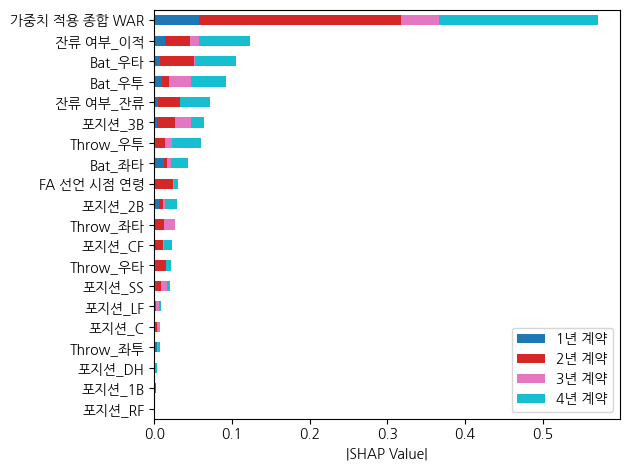

In [ ]:
x_background_ba = x_ba_train[:100].astype('float32')
x_sample_ba = x_ba_test[:50].astype('float32')

# 클래스별 SHAP 계산 함수 정의
def predict_class0(x):
    return model_ba.predict(x)[0][:, 0]

def predict_class1(x):
    return model_ba.predict(x)[0][:, 1]

def predict_class2(x):
    return model_ba.predict(x)[0][:, 2]

def predict_class3(x):
    return model_ba.predict(x)[0][:, 3]

def predict_class4(x):
    return model_ba.predict(x)[0][:, 4]

def predict_class5(x):
    return model_ba.predict(x)[0][:, 5]

def predict_class6(x):
    return model_ba.predict(x)[0][:, 6]

def predict_class7(x):
    return model_ba.predict(x)[0][:, 7]

# 각각에 대해 explainer 및 SHAP 값 계산
# 실질적으로 계약 예측이 4년까지만 되어 있으므로 시각적 편의를 위해 4년 계약까지만 표시
explainer0_ba = shap.KernelExplainer(predict_class0, x_background_ba)
explainer1_ba = shap.KernelExplainer(predict_class1, x_background_ba)
explainer2_ba = shap.KernelExplainer(predict_class2, x_background_ba)
explainer3_ba = shap.KernelExplainer(predict_class3, x_background_ba)
# explainer4_ba = shap.KernelExplainer(predict_class4, x_background_ba)
# explainer5_ba = shap.KernelExplainer(predict_class5, x_background_ba)
# explainer6_ba = shap.KernelExplainer(predict_class6, x_background_ba)
# explainer7_ba = shap.KernelExplainer(predict_class7, x_background_ba)

shap_values0_ba = explainer0_ba.shap_values(x_sample_ba, nsamples=100)
shap_values1_ba = explainer1_ba.shap_values(x_sample_ba, nsamples=100)
shap_values2_ba = explainer2_ba.shap_values(x_sample_ba, nsamples=100)
shap_values3_ba = explainer3_ba.shap_values(x_sample_ba, nsamples=100)
# shap_values4_ba = explainer4_ba.shap_values(x_sample_ba, nsamples=100)
# shap_values5_ba = explainer5_ba.shap_values(x_sample_ba, nsamples=100)
# shap_values6_ba = explainer6_ba.shap_values(x_sample_ba, nsamples=100)
# shap_values7_ba = explainer7_ba.shap_values(x_sample_ba, nsamples=100)

# 절댓값 기준 평균 SHAP 영향력 계산
mean_abs_shap0_ba = np.abs(shap_values0_ba).mean(axis=0)
mean_abs_shap1_ba = np.abs(shap_values1_ba).mean(axis=0)
mean_abs_shap2_ba = np.abs(shap_values2_ba).mean(axis=0)
mean_abs_shap3_ba = np.abs(shap_values3_ba).mean(axis=0)
# mean_abs_shap4_ba = np.abs(shap_values4_ba).mean(axis=0)
# mean_abs_shap5_ba = np.abs(shap_values5_ba).mean(axis=0)
# mean_abs_shap6_ba = np.abs(shap_values6_ba).mean(axis=0)
# mean_abs_shap7_ba = np.abs(shap_values7_ba).mean(axis=0)

# DataFrame 구성
df = pd.DataFrame({
    '1년 계약': mean_abs_shap0_ba,
    '2년 계약': mean_abs_shap1_ba,
    '3년 계약': mean_abs_shap2_ba,
    '4년 계약': mean_abs_shap3_ba
    # 'Class 4': mean_abs_shap4_ba,
    # 'Class 5': mean_abs_shap5_ba,
    # 'Class 6': mean_abs_shap6_ba,
    # 'Class 7': mean_abs_shap7_ba,
}, index=feature_names_ba)

df["total"] = df.sum(axis=1)

# 총합 기준으로 정렬
df_sorted = df.sort_values("total", ascending=True)
df_sorted = df_sorted.drop(columns="total")

# 시각화
df_sorted.plot(kind='barh', stacked=True, colormap='tab10')
plt.xlabel("|SHAP Value|")
plt.tight_layout()
plt.legend(loc='lower right')
plt.show()

#### rmsprop 시도

In [ ]:
from sklearn.preprocessing import RobustScaler
import pandas as pd
from sklearn.model_selection import *

# 데이터 결합
data = pd.concat([df_pi_m2, df_pi_25], ignore_index=True)

# 원핫 인코딩 (포지션, 잔류 여부)
cat_cols = ['포지션', 'Throw', '잔류 여부']
data_oh = pd.get_dummies(data[cat_cols])

# 입출력 정의
x_pi_all = pd.concat([data_oh, data[['FA 선언 시점 연령', '가중치 적용 종합 WAR']]], axis=1)
y_pi_year_all = data['FA 계약 연수'] - 1  # to_categorical을 위한 0 기반 인덱스
y_pi_value_all = data['FA 계약 총액']

# 훈련/테스트 분할
x_pi_train = x_pi_all.iloc[:len(df_pi_m2)]
x_pi_test = x_pi_all.iloc[len(df_pi_m2):]
y_pi_year_train = y_pi_year_all.iloc[:len(df_pi_m2)]
y_pi_year_test = y_pi_year_all.iloc[len(df_pi_m2):]
y_pi_value_train = y_pi_value_all.iloc[:len(df_pi_m2)]
y_pi_value_test = y_pi_value_all.iloc[len(df_pi_m2):]

feature_names = list(x_pi_test.columns)

# 연수 → 원핫 인코딩
from tensorflow.keras.utils import to_categorical

y_pi_year_train_cat = to_categorical(y_pi_year_train)
y_pi_year_test_cat = to_categorical(y_pi_year_test)

# 정규분포에 가까운 총액 분포를 만들고자 RobustScaler 사용
scaler = RobustScaler()
y_pi_value_train_scaled = scaler.fit_transform(y_pi_value_train.values.reshape(-1, 1))
y_pi_value_test_scaled = scaler.transform(y_pi_value_test.values.reshape(-1, 1))

# 훈련/검증 분할
x_pi_tr, x_pi_val, y_pi_year_tr, y_pi_year_val, y_pi_value_tr, y_pi_value_val = train_test_split(x_pi_train, y_pi_year_train_cat, y_pi_value_train_scaled, test_size=0.2, random_state=0)

# 케라스 분석을 위해 ndarray 형태로 자료를 변형
x_pi_tr = x_pi_tr.astype('float32').values
x_pi_val = x_pi_val.astype('float32').values
x_pi_test = x_pi_test.astype('float32').values
x_pi_train = x_pi_train.astype('float32').values

# 모델 구성
from tensorflow.keras.models import Model
from tensorflow.keras.layers import *
from tensorflow.keras.optimizers import RMSprop

input_layer = Input(shape=(x_pi_tr.shape[1],))
x = Dense(64)(input_layer)
x = ReLU()(x)
x = Dense(32)(x)
x = LeakyReLU()(x)

# 연수 분류 출력
output_pi_year = Dense(4, name='year_output_dense')(x)
output_pi_year = Activation('softmax', name='year_output')(output_pi_year)

# 총액 회귀 출력
output_pi_value = Dense(1, name='value_output_dense')(x)
output_pi_value = Activation('linear', name='value_output')(output_pi_value)

model = Model(inputs=input_layer, outputs=[output_pi_year, output_pi_value])
model.compile(optimizer=RMSprop(0.001),
    loss={'year_output': 'categorical_crossentropy', 'value_output': 'mse'},
    metrics={'year_output': 'accuracy', 'value_output': 'mse'})

# 학습
model.fit(x_pi_tr,
          {'year_output': y_pi_year_tr, 'value_output': y_pi_value_tr},
          validation_data=(x_pi_val, {'year_output': y_pi_year_val, 'value_output': y_pi_value_val}),
          epochs=100, batch_size=8, verbose=1)

# 예측
y_pi_pred_year_prob, y_pi_pred_value_scaled = model.predict(x_pi_test)
y_pi_pred_year_cls = y_pi_pred_year_prob.argmax(axis=1) + 1
y_pi_pred_value = scaler.inverse_transform(y_pi_pred_value_scaled)

# 실제 값 복원
y_pi_true_year_cls = y_pi_year_test.values + 1
y_pi_true_value = scaler.inverse_transform(y_pi_value_test_scaled)

# 결과 출력
result_df = pd.DataFrame({
    '선수명' : names_pi_25,
    '예상 연수': y_pi_pred_year_cls,
    '예상 총액': y_pi_pred_value.flatten(),
    '실제 연수': y_pi_true_year_cls,
    '실제 총액': y_pi_true_value.flatten()
})

result_df

Epoch 1/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 59ms/step - loss: 6.1762 - value_output_loss: 1.7516 - value_output_mse: 1.7673 - year_output_accuracy: 0.3560 - year_output_loss: 4.3483 - val_loss: 4.7215 - val_value_output_loss: 1.2355 - val_value_output_mse: 1.3144 - val_year_output_accuracy: 0.3077 - val_year_output_loss: 3.0908
Epoch 2/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 3.6591 - value_output_loss: 0.7699 - value_output_mse: 0.7711 - year_output_accuracy: 0.2232 - year_output_loss: 2.8623 - val_loss: 3.1004 - val_value_output_loss: 0.8468 - val_value_output_mse: 0.9218 - val_year_output_accuracy: 0.3077 - val_year_output_loss: 1.9987
Epoch 3/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 2.4962 - value_output_loss: 0.6412 - value_output_mse: 0.6414 - year_output_accuracy: 0.3140 - year_output_loss: 1.8596 - val_loss: 2.2429 - val_value_output_loss: 0.8083 - val_value_output_mse: 0.8774 - val_year_output_accuracy: 0.3077 - val_year_output_loss: 1.2909
Epoch 4/100
7/7 ━━━━━━

,선수명,예상 연수,예상 총액,실제 연수,실제 총액
0,구승민,2,10.122168,4.0,21.0
1,김강률,4,20.408604,4.0,14.0
2,김원중,4,35.141193,4.0,54.0
3,노경은,4,34.054550,3.0,25.0
5,엄상백,4,75.314873,4.0,78.0
6,우규민,2,2.352221,2.0,7.0
7,이용찬,3,11.653425,3.0,10.0
8,임기영,4,29.021038,3.0,15.0
9,임정호,2,5.497261,3.0,12.0
10,장현식,4,39.702881,4.0,52.0


In [ ]:
ac_pi = accuracy_score(y_pi_true_year_cls, y_pi_pred_year_cls)
fs_pi = f1_score(y_pi_true_year_cls, y_pi_pred_year_cls, average='weighted')
r2_pi = r2_score(y_pi_true_value, y_pi_pred_value)
rmse_pi = mean_squared_error(y_pi_true_value, y_pi_pred_value) ** 0.5

print(f"연수 예측 accuracy : {ac_pi :.4f}")
print(f"연수 예측 f1-score: {fs_pi :.4f}")
print(f"총액 예측 R²: {r2_pi :.4f}")
print(f"총액 예측 RMSE: {rmse_pi :,.0f}억 원")

# 랜덤성을 배제한 케라스 모델의 평균적인 예측치는 f1-score가 0.6 수준
# 총액에서도 상당히 높은 예측력을 보임
# 샘플이 적음에도 배깅 기법을 쓰는 랜덤포레스트를 능가할 만큼 회귀 예측력이 뛰어났음

연수 예측 accuracy : 0.6364
연수 예측 f1-score: 0.6105
총액 예측 R²: 0.8251
총액 예측 RMSE: 10억 원


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step 
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step 


  0%|          | 0/11 [00:00<?, ?it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 72ms/step
197/197 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 103ms/step
197/197 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step
197/197 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 74ms/step
197/197 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
197/197 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step
197/197 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step
197/197 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
197/197 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
197/197 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
197/197 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
197/197 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


  0%|          | 0/11 [00:00<?, ?it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
197/197 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
197/197 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
197/197 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
197/197 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
197/197 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step
197/197 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
197/197 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
197/197 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
197/197 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step
197/197 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step
197/197 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


  0%|          | 0/11 [00:00<?, ?it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step
197/197 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
197/197 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
197/197 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
197/197 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
197/197 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
197/197 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
197/197 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
197/197 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
197/197 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step
197/197 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
197/197 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


  0%|          | 0/11 [00:00<?, ?it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
197/197 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
197/197 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
197/197 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
197/197 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
197/197 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step
197/197 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step
197/197 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
197/197 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step
197/197 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step
197/197 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
197/197 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


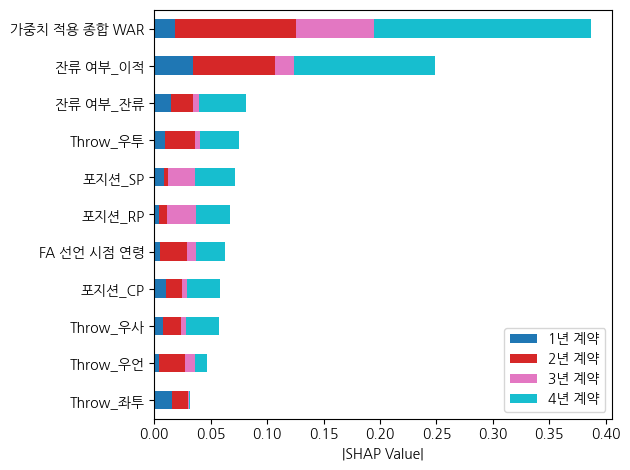

In [ ]:
# shap 차트 구성
x_background = x_pi_train[:100]
x_sample = x_pi_test[:50]
feature_names = feature_names

def predict_class0(x):
    return model.predict(x)[0][:, 0]

def predict_class1(x):
    return model.predict(x)[0][:, 1]

def predict_class2(x):
    return model.predict(x)[0][:, 2]

def predict_class3(x):
    return model.predict(x)[0][:, 3]

# 각각에 대해 explainer 및 SHAP 값 계산
explainer0 = shap.KernelExplainer(predict_class0, x_background)
explainer1 = shap.KernelExplainer(predict_class1, x_background)
explainer2 = shap.KernelExplainer(predict_class2, x_background)
explainer3 = shap.KernelExplainer(predict_class3, x_background)

shap_values0 = explainer0.shap_values(x_sample, nsamples=100)
shap_values1 = explainer1.shap_values(x_sample, nsamples=100)
shap_values2 = explainer2.shap_values(x_sample, nsamples=100)
shap_values3 = explainer3.shap_values(x_sample, nsamples=100)

# 절댓값 기준 평균 SHAP 영향력 계산
mean_abs_shap0 = np.abs(shap_values0).mean(axis=0)
mean_abs_shap1 = np.abs(shap_values1).mean(axis=0)
mean_abs_shap2 = np.abs(shap_values2).mean(axis=0)
mean_abs_shap3 = np.abs(shap_values3).mean(axis=0)

# DataFrame 구성
df = pd.DataFrame({
    '1년 계약': mean_abs_shap0,
    '2년 계약': mean_abs_shap1,
    '3년 계약': mean_abs_shap2,
    '4년 계약': mean_abs_shap3
}, index=feature_names)

df["total"] = df.sum(axis=1)

# 총합 기준으로 정렬
df_sorted = df.sort_values("total", ascending=True)
df_sorted = df_sorted.drop(columns="total")

# 시각화
df_sorted.plot(kind='barh', stacked=True, colormap='tab10')
plt.xlabel("|SHAP Value|")
plt.tight_layout()
plt.show()


In [ ]:
# 같은 방법으로 야수도 진행
# 데이터 결합
data_ba = pd.concat([df_ba_m2, df_ba_25], ignore_index=True)

# 원핫 인코딩 (포지션, 잔류 여부)
cat_cols_ba = ['포지션', 'Throw', 'Bat', '잔류 여부']
data_oh_ba = pd.get_dummies(data_ba[cat_cols_ba])

# 입출력 정의
x_ba_all = pd.concat([data_oh_ba, data_ba[['FA 선언 시점 연령', '가중치 적용 종합 WAR']]], axis=1)
y_year_ba_all = data_ba['FA 계약 연수'] - 1  # to_categorical을 위한 0 기반 인덱스
y_value_ba_all = data_ba['FA 계약 총액']

# 훈련/테스트 분할
x_ba_train = x_ba_all.iloc[:len(df_ba_m2)]
x_ba_test = x_ba_all.iloc[len(df_ba_m2):]
y_year_ba_train = y_year_ba_all.iloc[:len(df_ba_m2)]
y_year_ba_test = y_year_ba_all.iloc[len(df_ba_m2):]
y_value_ba_train = y_value_ba_all.iloc[:len(df_ba_m2)]
y_value_ba_test = y_value_ba_all.iloc[len(df_ba_m2):]

feature_names_ba = list(x_ba_test.columns)

# 연수 → 원핫 인코딩
y_year_ba_train_cat = to_categorical(y_year_ba_train)
y_year_ba_test_cat = to_categorical(y_year_ba_test)

# 총액 → RobustScaler
scaler = RobustScaler()
y_value_ba_train_scaled = scaler.fit_transform(y_value_ba_train.values.reshape(-1, 1))
y_value_ba_test_scaled = scaler.transform(y_value_ba_test.values.reshape(-1, 1))

# 훈련/검증 분할
x_ba_tr, x_ba_val, y_year_ba_tr, y_year_ba_val, y_value_ba_tr, y_value_ba_val = train_test_split(x_ba_train, y_year_ba_train_cat, y_value_ba_train_scaled, test_size=0.2, random_state=0)

# 케라스 분석을 위해 ndarray 형태로 자료를 변형
x_ba_tr = x_ba_tr.astype('float32').values
x_ba_val = x_ba_val.astype('float32').values
x_ba_test = x_ba_test.astype('float32').values
x_ba_train = x_ba_train.astype('float32').values

# 모델 구성
input_ba_layer = Input(shape=(x_ba_tr.shape[1],))
x = Dense(64)(input_ba_layer)
x = ReLU()(x)
x = Dense(32)(x)
x = LeakyReLU()(x)

# 연수 분류 출력
output_ba_year = Dense(8, name='year_output_dense')(x)
output_ba_year = Activation('softmax', name='year_output')(output_ba_year)

# 총액 회귀 출력
output_ba_value = Dense(1, name='value_output_dense')(x)
output_ba_value = Activation('linear', name='value_output')(output_ba_value)

model_ba = Model(inputs=input_ba_layer, outputs=[output_ba_year, output_ba_value])
model_ba.compile(optimizer=RMSprop(0.0005),
              loss={'year_output': 'categorical_crossentropy', 'value_output': 'mse'},
              metrics={'year_output': 'accuracy', 'value_output': 'mse'})

# 학습
model_ba.fit(x_ba_tr,
          {'year_output': y_year_ba_tr, 'value_output': y_value_ba_tr},
          validation_data=(x_ba_val, {'year_output': y_year_ba_val, 'value_output': y_value_ba_val}),
          epochs=100, batch_size=8, verbose=1)

# 예측 및 역변환
y_pred_year_ba_prob, y_pred_value_ba_scaled = model_ba.predict(x_ba_test)
y_pred_year_ba_cls = y_pred_year_ba_prob.argmax(axis=1) + 1
y_pred_ba_value = scaler.inverse_transform(y_pred_value_ba_scaled)

y_true_year_ba_cls = y_year_ba_test.values + 1
y_true_ba_value = scaler.inverse_transform(y_value_ba_test_scaled)

# 결과 출력
result_df_ba = pd.DataFrame({
    '선수명' : names_ba_25,
    '예상 연수': y_pred_year_ba_cls,
    '예상 총액': y_pred_ba_value.flatten(),
    '실제 연수': y_true_year_ba_cls,
    '실제 총액': y_true_ba_value.flatten()
})

result_df_ba

Epoch 1/100
14/14 ━━━━━━━━━━━━━━━━━━━━ 2s 43ms/step - loss: 68.2243 - value_output_loss: 57.1408 - value_output_mse: 57.2570 - year_output_accuracy: 0.0061 - year_output_loss: 10.9795 - val_loss: 14.8611 - val_value_output_loss: 4.8709 - val_value_output_mse: 5.1928 - val_year_output_accuracy: 0.0000e+00 - val_year_output_loss: 9.4169
Epoch 2/100
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 15.4201 - value_output_loss: 6.9167 - value_output_mse: 6.9170 - year_output_accuracy: 0.0103 - year_output_loss: 8.5131 - val_loss: 9.8624 - val_value_output_loss: 2.9460 - val_value_output_mse: 2.6113 - val_year_output_accuracy: 0.0000e+00 - val_year_output_loss: 6.9144
Epoch 3/100
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 9.6091 - value_output_loss: 3.4804 - value_output_mse: 3.4747 - year_output_accuracy: 0.0492 - year_output_loss: 6.1384 - val_loss: 6.7978 - val_value_output_loss: 2.1365 - val_value_output_mse: 1.8810 - val_year_output_accuracy: 0.0741 - val_year_output_loss: 4.6061
Ep

,선수명,예상 연수,예상 총액,실제 연수,실제 총액
0,김성욱,2,7.793358,3.0,12.0
1,김헌곤,2,16.593306,2.0,6.0
2,류지혁,2,15.226809,4.0,26.0
3,서건창,2,2.321396,2.0,5.0
4,심우준,4,21.803202,4.0,50.0
5,최정,4,115.150070,4.0,110.0
6,하주석,2,2.041592,1.0,1.1
7,허경민,4,57.466324,4.0,40.0


In [ ]:
ac_ba = accuracy_score(y_true_year_ba_cls, y_pred_year_ba_cls)
fs_ba = f1_score(y_true_year_ba_cls, y_pred_year_ba_cls, average='weighted')
r2_ba = r2_score(y_true_ba_value, y_pred_ba_value)
rmse_ba = mean_squared_error(y_true_ba_value, y_pred_ba_value) ** 0.5

print(f"연수 예측 accuracy : {ac_ba:.4f}")
print(f"연수 예측 f1-score: {fs_ba:.4f}")
print(f"총액 예측 R²: {r2_ba:.4f}")
print(f"총액 예측 RMSE: {rmse_ba:,.0f}억 원")

# 맞히기 힘든 연수에서도 절반의 기준점을 넘기고 총액에선 아주 우수한 예측력을 보임
# relu 64, leaky_relu 32, batch_size 8, epoch 100에서 평균적으로 가장 우수한 예측력이 발휘

연수 예측 accuracy : 0.6250
연수 예측 f1-score: 0.5714
총액 예측 R²: 0.8510
총액 예측 RMSE: 13억 원


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step 
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step


  0%|          | 0/8 [00:00<?, ?it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


  0%|          | 0/8 [00:00<?, ?it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


  0%|          | 0/8 [00:00<?, ?it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


  0%|          | 0/8 [00:00<?, ?it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


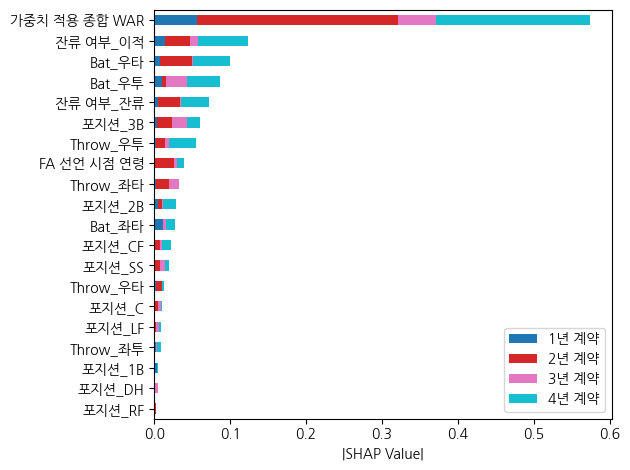

In [ ]:
x_background_ba = x_ba_train[:100].astype('float32')
x_sample_ba = x_ba_test[:50].astype('float32')

# 클래스별 SHAP 계산 함수 정의
def predict_class0(x):
    return model_ba.predict(x)[0][:, 0]

def predict_class1(x):
    return model_ba.predict(x)[0][:, 1]

def predict_class2(x):
    return model_ba.predict(x)[0][:, 2]

def predict_class3(x):
    return model_ba.predict(x)[0][:, 3]

def predict_class4(x):
    return model_ba.predict(x)[0][:, 4]

def predict_class5(x):
    return model_ba.predict(x)[0][:, 5]

def predict_class6(x):
    return model_ba.predict(x)[0][:, 6]

def predict_class7(x):
    return model_ba.predict(x)[0][:, 7]

# 각각에 대해 explainer 및 SHAP 값 계산
explainer0_ba = shap.KernelExplainer(predict_class0, x_background_ba)
explainer1_ba = shap.KernelExplainer(predict_class1, x_background_ba)
explainer2_ba = shap.KernelExplainer(predict_class2, x_background_ba)
explainer3_ba = shap.KernelExplainer(predict_class3, x_background_ba)
explainer4_ba = shap.KernelExplainer(predict_class4, x_background_ba)
explainer5_ba = shap.KernelExplainer(predict_class5, x_background_ba)
explainer6_ba = shap.KernelExplainer(predict_class6, x_background_ba)
explainer7_ba = shap.KernelExplainer(predict_class7, x_background_ba)

shap_values0_ba = explainer0_ba.shap_values(x_sample_ba, nsamples=100)
shap_values1_ba = explainer1_ba.shap_values(x_sample_ba, nsamples=100)
shap_values2_ba = explainer2_ba.shap_values(x_sample_ba, nsamples=100)
shap_values3_ba = explainer3_ba.shap_values(x_sample_ba, nsamples=100)
# shap_values4_ba = explainer4_ba.shap_values(x_sample_ba, nsamples=100)
# shap_values5_ba = explainer5_ba.shap_values(x_sample_ba, nsamples=100)
# shap_values6_ba = explainer6_ba.shap_values(x_sample_ba, nsamples=100)
# shap_values7_ba = explainer7_ba.shap_values(x_sample_ba, nsamples=100)

# 절댓값 기준 평균 SHAP 영향력 계산
mean_abs_shap0_ba = np.abs(shap_values0_ba).mean(axis=0)
mean_abs_shap1_ba = np.abs(shap_values1_ba).mean(axis=0)
mean_abs_shap2_ba = np.abs(shap_values2_ba).mean(axis=0)
mean_abs_shap3_ba = np.abs(shap_values3_ba).mean(axis=0)
# mean_abs_shap4_ba = np.abs(shap_values4_ba).mean(axis=0)
# mean_abs_shap5_ba = np.abs(shap_values5_ba).mean(axis=0)
# mean_abs_shap6_ba = np.abs(shap_values6_ba).mean(axis=0)
# mean_abs_shap7_ba = np.abs(shap_values7_ba).mean(axis=0)

# DataFrame 구성
df = pd.DataFrame({
    '1년 계약': mean_abs_shap0_ba,
    '2년 계약': mean_abs_shap1_ba,
    '3년 계약': mean_abs_shap2_ba,
    '4년 계약': mean_abs_shap3_ba
    # 'Class 4': mean_abs_shap4_ba,
    # 'Class 5': mean_abs_shap5_ba,
    # 'Class 6': mean_abs_shap6_ba,
    # 'Class 7': mean_abs_shap7_ba,
}, index=feature_names_ba)

df["total"] = df.sum(axis=1)

# 총합 기준으로 정렬
df_sorted = df.sort_values("total", ascending=True)
df_sorted = df_sorted.drop(columns="total")

# 시각화
df_sorted.plot(kind='barh', stacked=True, colormap='tab10')
plt.xlabel("|SHAP Value|")
plt.tight_layout()
plt.show()

### 설명 흐름
- 모델이 일관적으로 실제 금액보다 더 높게 평가한 선수가 실제로 잘하고 있음
- 모델이 일관적으로 실제 금액보다 낮게 평가한 선수가 대체로 못하고 있음

  → 선수를 평가할 때 정량화가 가능한 몇 가지 정보만으로 선수의 미래 적정 가치를 근사적으로 예측하는 것이 가능하다는 것을 어필
  
  → 이적한 선수들이 모델 예측 값보다 현저히 높은 계약을 따낸 경향을 보았을 때 외부 fa 영입이 시장 가치 이상의 비용을 지불하게 해 경영의 비효율성을 유발할 가능성이 높음을 시사

- 연수는 1년부터 8년까지 다양하게 나올 수 있어 분류 점수가 높게 나오기 어려운데도 잘 맞혔음

## 모범 fa 사례

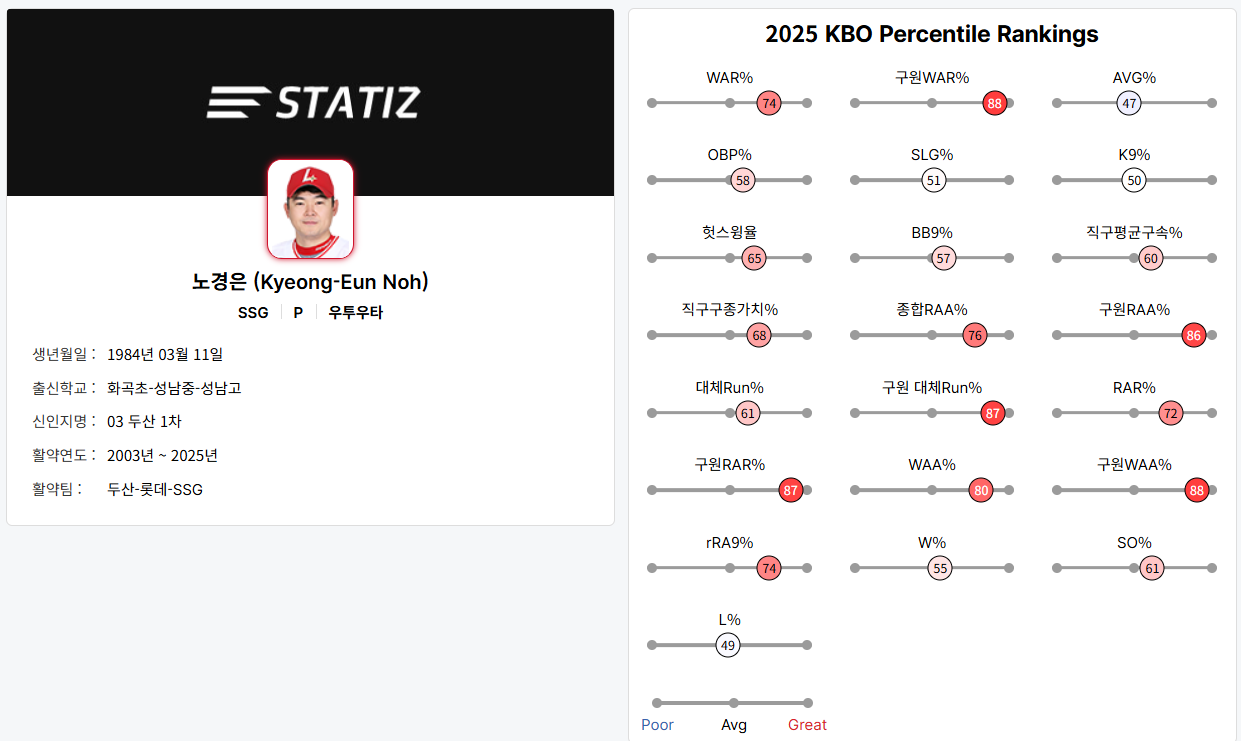

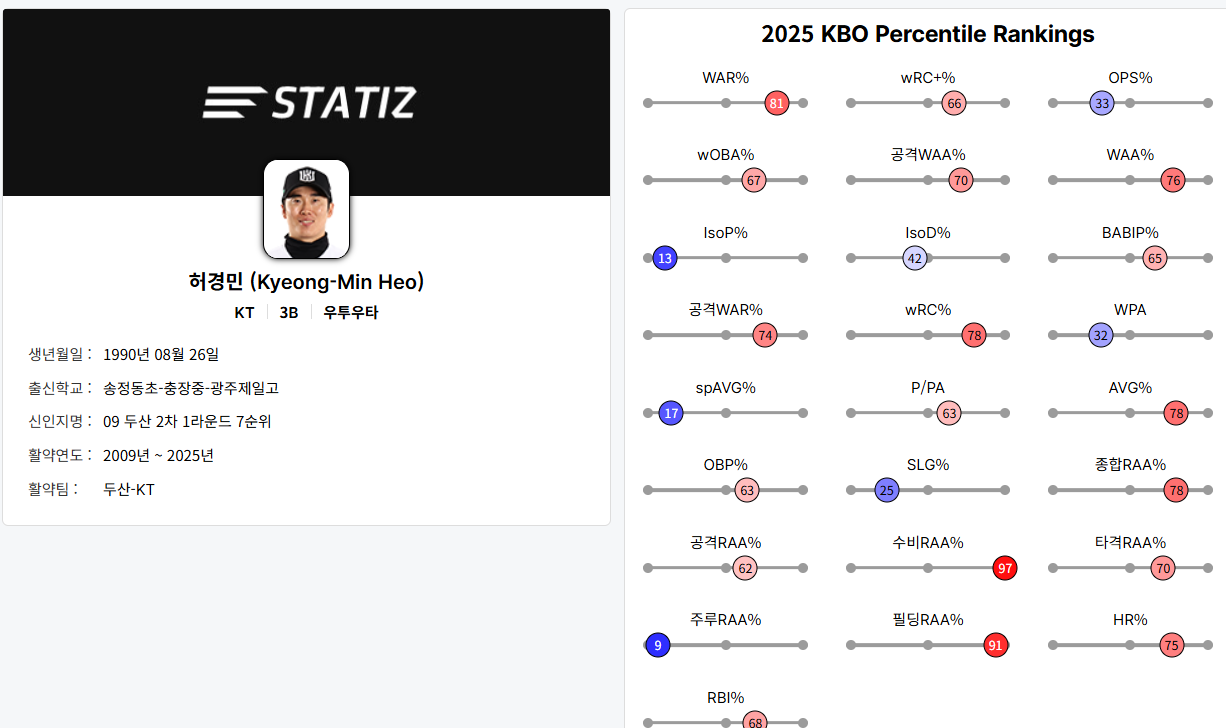

## 잘못된 fa 사례

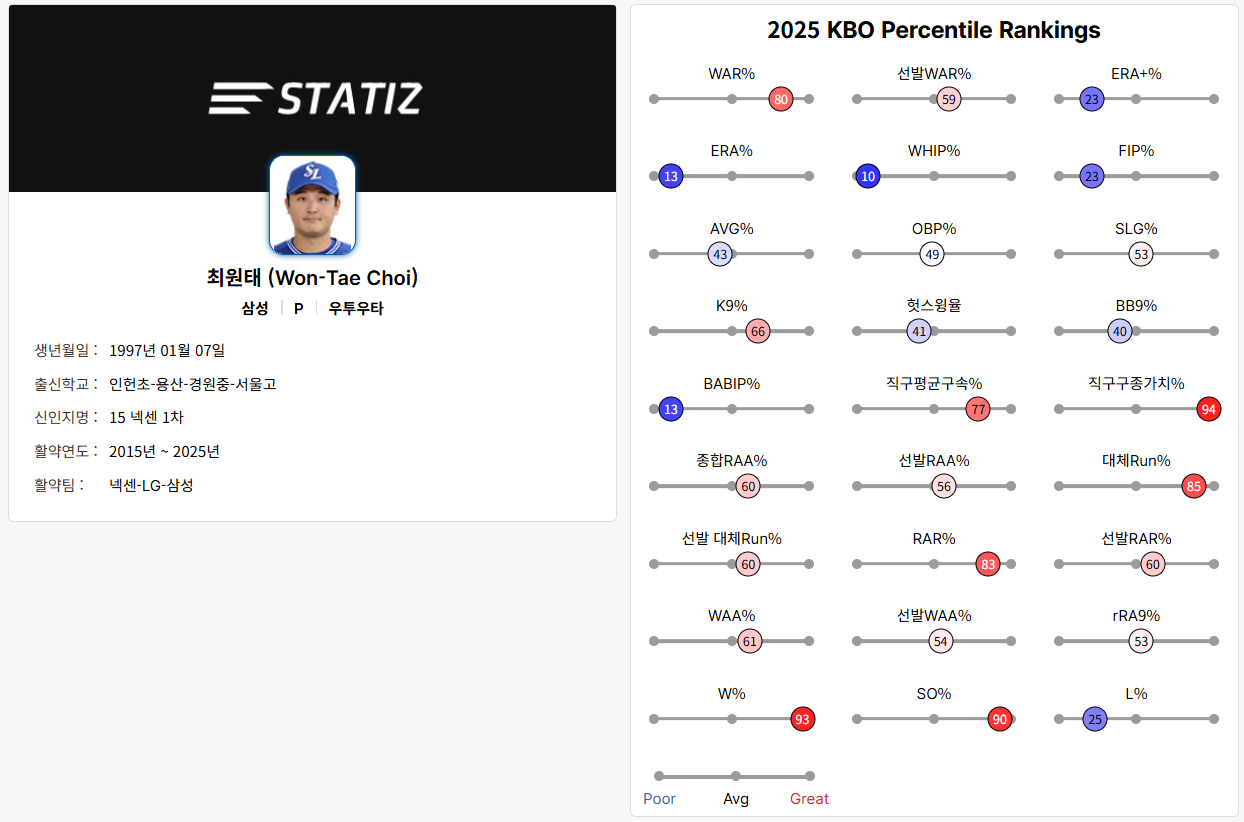

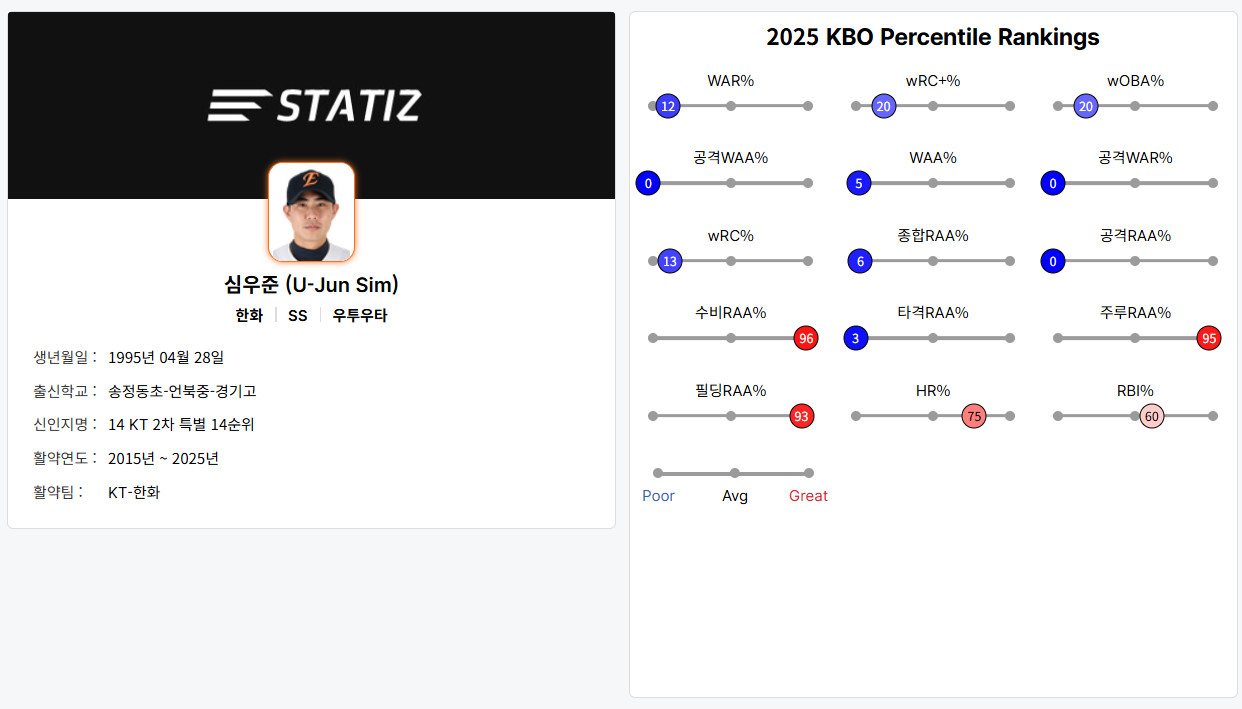